In [ ]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
import os

print(os.path.exists("/mnt/home3/miska/nm667/scratch/inProgress/dev/data/GSE211785_Susztak_KPMP_SC_SN_ATAC_merged_PostSCVI_final.h5ad"))
# print(os.path.exists("/mnt/home3/miska/nm667/scratch/inProgress/dev/data/GSE211785_Susztak_SC_SN_ATAC_merged_PostSCVI_final.h5ad"))
# --- 1. Read processed data ---
adata = sc.read_h5ad("/mnt/home3/miska/nm667/scratch/inProgress/dev/data/GSE211785_Susztak_KPMP_SC_SN_ATAC_merged_PostSCVI_final.h5ad")
# adata = sc.read_h5ad("/mnt/home3/miska/nm667/scratch/inProgress/dev/data/GSE211785_Susztak_SC_SN_ATAC_merged_PostSCVI_final.h5ad")


print(f"Number of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")


True
Number of cells: 588177
Number of genes: 3000


In [29]:


# ------------------------------
# 2) Load metadata file
# ------------------------------
meta_path = "/mnt/home3/miska/nm667/scratch/inProgress/dev/data/GSE211785_scRNA-seq_snRNA-seq_snATAC-seq_metadata.txt"

meta = pd.read_csv(meta_path)

# ------------------------------
# 3) Use the FIRST unnamed column as real cell IDs
# ------------------------------
first_col = meta.columns[0]   # this is the one with real cell barcodes
print("Using first column as cell_id:", first_col)

meta = meta.rename(columns={first_col: "cell_id"})
meta = meta.set_index("cell_id")

print("\nMetadata columns:", meta.columns.tolist())
print(meta.head(3))


Using first column as cell_id: Unnamed: 0

Metadata columns: ['orig_ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'tech', 'sex', 'age', 'group', 'group2', 'Cluster_Idents']
                                  orig_ident   nCount_RNA  nFeature_RNA  \
cell_id                                                                   
HK2893.SN_AAACCCAAGAACTTCC-1_9_1   HK2893.SN  1160.504472           969   
HK2898.SN_AAACCCAAGACGATAT-1_11_1  HK2898.SN  1725.392859          1444   
HK2862.SN_AAACCCAAGACTTGTC-1_15_1  HK2862.SN  1146.869160           901   

                                   percent_mt    tech   sex   age    group  \
cell_id                                                                      
HK2893.SN_AAACCCAAGAACTTCC-1_9_1          0.0  SN_RNA  Male  37.0  Control   
HK2898.SN_AAACCCAAGACGATAT-1_11_1         0.0  SN_RNA  Male  65.0  Control   
HK2862.SN_AAACCCAAGACTTGTC-1_15_1         0.0  SN_RNA  Male  48.0      DKD   

                                    group2 Cluster_Ide

In [31]:
# ------------------------------
# 4) Columns that you want to add
# ------------------------------
wanted_cols = ["group", "group2", "Cluster_Idents"]

# Keep only columns that exist
wanted_cols = [c for c in wanted_cols if c in meta.columns]

print("\nColumns to add:", wanted_cols)

# ------------------------------
# 5) Check overlap with AnnData
# ------------------------------
adata_ids = set(adata.obs.index)
meta_ids = set(meta.index)

common = adata_ids & meta_ids

print(f"\nAnnData cells:       {len(adata_ids):,}")
print(f"Metadata cells:      {len(meta_ids):,}")
print(f"Common cell IDs:     {len(common):,}")
print(f"Overlap percentage:  {len(common)/len(adata_ids)*100:.2f}%")

# ------------------------------
# 6) Merge ONLY the desired metadata columns
# ------------------------------
adata.obs = adata.obs.join(meta[wanted_cols], how="left")

print("\n✔ Added these metadata columns:", wanted_cols)



Columns to add: ['group', 'group2', 'Cluster_Idents']

AnnData cells:       588,177
Metadata cells:      338,565
Common cell IDs:     324,164
Overlap percentage:  55.11%

✔ Added these metadata columns: ['group', 'group2', 'Cluster_Idents']


In [32]:
genes = [
    "ALDOB","ALDH8A1","NAT8B","SLC5A10","PAX8","CUBN","SLC17A3","ACSF2","ARMC7",
    "BDH2","BICC1","CRB2","CYFIP2","EFHD1","HOXA9","KCNJ15","LGALS2","OCIAD2",
    "PEPD","RGL3","SHMT1","SLC2A9","SLC9A3","TM7SF3"
]

for g in genes:
    matches = [gene for gene in adata.raw.var_names if g.lower() in gene.lower()]
    print(f"{g} matches: {matches}")


ALDOB matches: ['ALDOB']
ALDH8A1 matches: ['ALDH8A1']
NAT8B matches: []
SLC5A10 matches: ['SLC5A10']
PAX8 matches: ['PAX8']
CUBN matches: ['CUBN']
SLC17A3 matches: ['SLC17A3']
ACSF2 matches: ['ACSF2']
ARMC7 matches: ['ARMC7']
BDH2 matches: ['BDH2']
BICC1 matches: ['BICC1']
CRB2 matches: ['CRB2']
CYFIP2 matches: ['CYFIP2']
EFHD1 matches: ['EFHD1']
HOXA9 matches: ['HOXA9']
KCNJ15 matches: ['KCNJ15']
LGALS2 matches: ['LGALS2']
OCIAD2 matches: ['OCIAD2']
PEPD matches: ['PEPD']
RGL3 matches: ['RGL3']
SHMT1 matches: ['SHMT1']
SLC2A9 matches: ['SLC2A9']
SLC9A3 matches: ['SLC9A3', 'SLC9A3R2', 'SLC9A3R1']
TM7SF3 matches: ['TM7SF3']


In [33]:
# List unique 'Cluster_Idents_New2' values
adata.obs['Cluster_Idents_New2'].unique().tolist()


['PT_S3',
 'Macula_Densa',
 'PT_S1',
 'MyoFib',
 'Mac',
 'DCT1',
 'Endo_Peritubular',
 'IC_A',
 'M_TAL',
 'C_TAL',
 'iPT',
 'PC',
 'DTL',
 'NK',
 'B_Naive',
 'CNT',
 'GS_Stromal',
 'Mes',
 'Podo',
 'ATL',
 'Endo_GC',
 'cDC',
 'DCT2',
 'PEC',
 'Plasma_Cells',
 'IC_B',
 'Neural_Cells',
 'pDC',
 'CD8T',
 'CD4T',
 'VSMC/Pericyte',
 'Neutrophil',
 'PT_S2',
 'Fib',
 'B_memory',
 'Enod_Lym',
 'CD14_Mono',
 'CD16_Mono',
 'Baso/Mast']

In [34]:
# --- 1. Extract relevant metadata ---
df = adata.obs[['Cluster_Idents_New2', 'group', 'tech']].copy()

# Drop missing values
#df = df.dropna(subset=['Cluster_Idents_New2', 'group', 'tech'])

df


,Cluster_Idents_New2,group,tech
HK2893.SN_AAACCCAAGAACTTCC-1_9_1,PT_S3,Control,SN_RNA
HK2862.SN_AAACCCAAGAAGCGCT-1_15_1,Macula_Densa,NaN,SN_RNA
HK2898.SN_AAACCCAAGACGATAT-1_11_1,PT_S1,Control,SN_RNA
HK2862.SN_AAACCCAAGACTTGTC-1_15_1,Macula_Densa,DKD,SN_RNA
HK2596.SN_AAACCCAAGATACCAA-1_16_1,MyoFib,DKD,SN_RNA
...,...,...,...
LDSample1162EO2_LDSample1162EO2_TTTGATCTCTCCTGCA-1,IC_A,NaN,SC_RNA
LDSample1162EO2_LDSample1162EO2_TTTGGAGAGCAGGCAT-1,CNT,NaN,SC_RNA
LDSample1162EO2_LDSample1162EO2_TTTGGAGAGTGCTCGC-1,PT_S1,NaN,SC_RNA
LDSample1162EO2_LDSample1162EO2_TTTGGAGGTGATACTC-1,IC_A,NaN,SC_RNA


In [35]:

# --- 2. Clean text fields ---
df['Cluster_Idents_New2'] = (
    df['Cluster_Idents_New2']
    .astype(str)
    .str.strip()
    .str.replace('_', ' ')
    .str.replace('-', ' ')
    .str.capitalize()
)

df['group'] = (
    df['group']
    .astype(str)
    .str.strip()
    .str.replace('_', ' ')
    .str.capitalize()
)

# --- 3. Normalize tech field ---
df['tech'] = (
    df['tech']
    .astype(str)
    .str.strip()
    .str.upper()
    .str.replace(' ', '')
    .str.replace('_', '')
)

# Map raw tech names → clean labels
tech_map = {
    'SCRNA': 'scRNA',
    'SNRNA': 'snRNA',
    'SNATAC': 'snATAC'
}
df['tech'] = df['tech'].replace(tech_map)

print("Normalized tech types:", df['tech'].unique())

# --- 4. Count cells per (celltype × group × tech) ---
cell_counts = (
    df.groupby(['Cluster_Idents_New2', 'group', 'tech'])
    .size()
    .reset_index(name='count')
)

# --- 5. Compute fractions ---
cell_counts['fraction'] = (
    cell_counts.groupby(['group', 'tech'])['count']
    .transform(lambda x: x / x.sum())
)
cell_counts['percentage'] = cell_counts['fraction'] * 100

# --- 6. Pivot for heatmap ---
heatmap_data = (
    cell_counts.pivot_table(
        index='Cluster_Idents_New2',
        columns=['group', 'tech'],
        values='percentage',
        fill_value=0
    )
).sort_index(axis=0).sort_index(axis=1, level=[0, 1])

heatmap_data.head()


Normalized tech types: ['snRNA' 'scRNA' 'snATAC']


group                 Control                            Dkd            \
tech                    scRNA    snATAC      snRNA     scRNA    snATAC   
Cluster_Idents_New2                                                      
Atl                  0.013410  0.262605   0.118566  0.056131  4.099201   
B memory             1.346717  0.007003   0.009719  1.127724  0.122976   
B naive              3.647440  0.028011   0.060255  0.785835  0.266448   
Baso/mast            0.105362  0.000000   0.000000  0.622544  0.000000   
C tal                1.846708  7.752101  10.429949  1.199163  7.686001   

group                               Hkd                             Nan  \
tech                    snRNA     scRNA    snATAC      snRNA      scRNA   
Cluster_Idents_New2                                                       
Atl                  0.167593  0.063416  0.716038   1.616742   1.429803   
B memory             0.020438  2.294521  0.005007   0.184489   0.976890   
B naive              1.030085  4.825413  0.040058   1.640683   0.240669   
Baso/mast            0.012263  0.401637  0.005007   0.004225   0.042638   
C tal                1.606442  1.239503  9.969456  11.187629  12.063787   

group                                    
tech                   snATAC     snRNA  
Cluster_Idents_New2                      
Atl                  4.327375  1.383639  
B memory             0.000000  0.025411  
B naive              0.094073  0.402132  
Baso/mast            0.000000  0.059716  
C tal                0.658514  8.942831

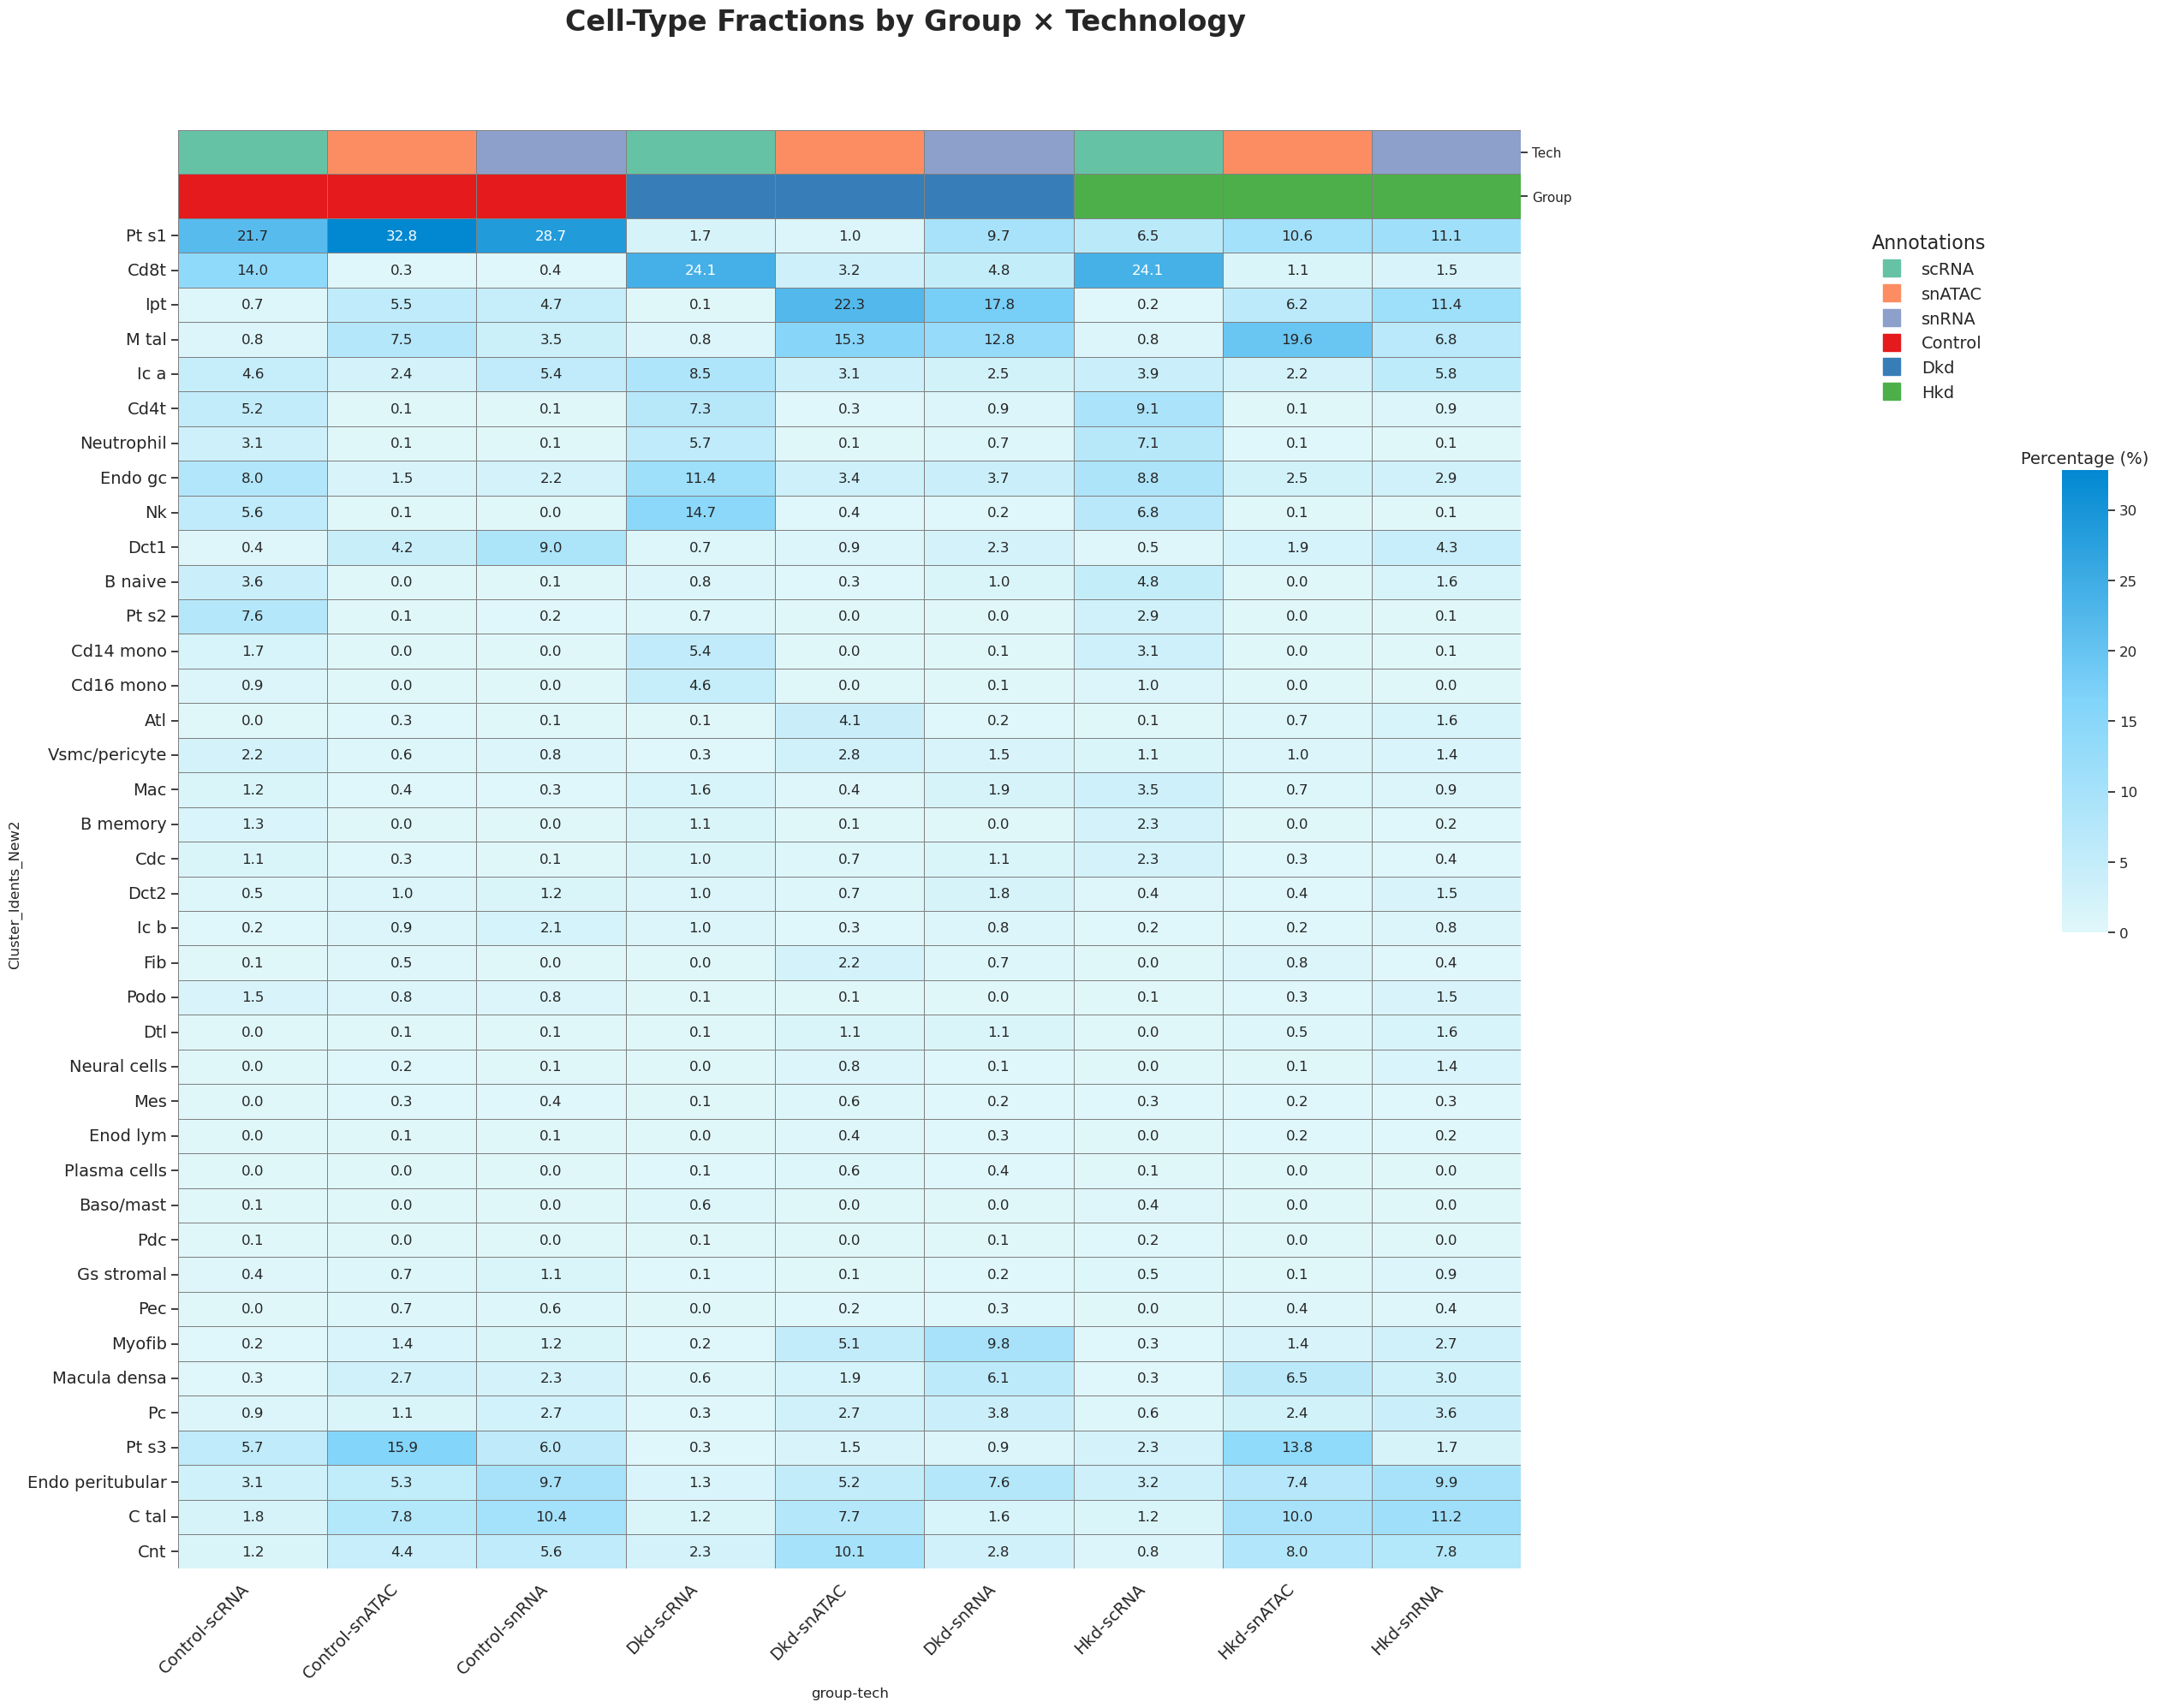

In [45]:
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# ---------------------------------------
# 1. Prepare data
# ---------------------------------------
df = adata.obs[['Cluster_Idents_New2', 'group', 'tech']].copy()
df = df.dropna(subset=['Cluster_Idents_New2', 'group', 'tech'])

df['Cluster_Idents_New2'] = (
    df['Cluster_Idents_New2']
    .astype(str).str.strip()
    .str.replace('_', ' ').str.replace('-', ' ')
    .str.capitalize()
)

df['group'] = (
    df['group']
    .astype(str).str.strip()
    .str.replace('_', ' ')
    .str.capitalize()
)

df['tech'] = (
    df['tech']
    .astype(str).str.strip().str.upper()
    .str.replace(' ', '').str.replace('_', '')
)

tech_map = {"SCRNA": "scRNA", "SNRNA": "snRNA", "SNATAC": "snATAC"}
df['tech'] = df['tech'].replace(tech_map)

# ---------------------------------------
# 2. Fractions
# ---------------------------------------
cell_counts = (
    df.groupby(['Cluster_Idents_New2', 'group', 'tech'])
    .size().reset_index(name='count')
)

cell_counts['fraction'] = (
    cell_counts.groupby(['group', 'tech'])['count']
    .transform(lambda x: x / x.sum())
)

cell_counts['percentage'] = cell_counts['fraction'] * 100

heatmap_data = (
    cell_counts.pivot_table(
        index='Cluster_Idents_New2',
        columns=['group', 'tech'],
        values='percentage',
        fill_value=0
    )
).sort_index(axis=0)

# ---------------------------------------
# 3. Annotation bars
# ---------------------------------------
groups = heatmap_data.columns.get_level_values(0)
techs = heatmap_data.columns.get_level_values(1)

group_palette = dict(
    zip(groups.unique(), sns.color_palette("Set1", len(groups.unique()))))
tech_palette = dict(
    zip(techs.unique(),  sns.color_palette("Set2", len(techs.unique()))))

col_colors = pd.DataFrame({
    "Tech":  [tech_palette[t] for t in techs],
    "Group": [group_palette[g] for g in groups]
}, index=heatmap_data.columns)

# ---------------------------------------
# 4. Clustermap (Wider figure)
# ---------------------------------------
blue_cmap = LinearSegmentedColormap.from_list(
    "blue_grad", ["#e0f7fa", "#81d4fa", "#0288d1"]
)

g = sns.clustermap(
    heatmap_data,
    cmap=blue_cmap,
    figsize=(18, 18),               # <--- bigger figure
    col_colors=col_colors,
    row_cluster=True,
    col_cluster=False,
    linewidths=0.4,
    linecolor="gray",
    annot=True,
    fmt=".1f",
    annot_kws={"fontsize": 12},     # <--- bigger numbers
    xticklabels=True,
    yticklabels=True,
    dendrogram_ratio=(0.02, 0.02),
    cbar_kws={"shrink": 0.4}        # colorbar will be repositioned
)

# Hide dendrograms
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

# ---------------------------------------
# 5. Move cell names LEFT with bigger font
# ---------------------------------------
g.ax_heatmap.yaxis.tick_left()
g.ax_heatmap.yaxis.set_label_position("left")
plt.setp(g.ax_heatmap.get_yticklabels(), ha="right",
         fontsize=14)   # <--- bigger font

# X-labels bigger
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=14)

# ---------------------------------------
# 6. Legend for Tech + Group (bigger fonts)
# ---------------------------------------

tech_handles = [Line2D([0], [0], marker='s', color=c, label=t, linestyle='', markersize=14)
                for t, c in tech_palette.items()]

group_handles = [Line2D([0], [0], marker='s', color=c, label=gname, linestyle='', markersize=14)
                 for gname, c in group_palette.items()]

legend = g.ax_heatmap.legend(
    handles=tech_handles + group_handles,
    title="Annotations",
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.25, 1.0),   # <--- moved right
    loc="upper left",
    frameon=False
)

# ---------------------------------------
# 7. Move the COLORBAR **below** the legend
# ---------------------------------------
cbar = g.ax_cbar
cbar.set_position([1.25, 0.45, 0.03, 0.30])   # <--- BELOW legend
cbar.set_title("Percentage (%)", fontsize=14)
cbar.tick_params(labelsize=12)

# ---------------------------------------
# 8. Title
# ---------------------------------------
g.fig.suptitle(
    "Cell-Type Fractions by Group × Technology",
    fontsize=24, fontweight="bold", y=1.05
)

# Save
g.savefig("cell_fraction_heatmap_group_tech_highres.png", dpi=600)
plt.show()


✅ Found 23 genes in adata.raw
⚠️ Missing genes: {'NAT8B'}
✅ Using 588,177 cells with valid annotations


/mnt/home3/miska/nm667/miniconda3/envs/cosmaxSpatial/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


/tmp/ipykernel_1911936/2512298456.py:153: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0.1, 0.1, 0.98, 0.95])


✅ Saved as: raw_expression_heatmap_celltype_top_tech_bottom_left_genelabels.[png/pdf]


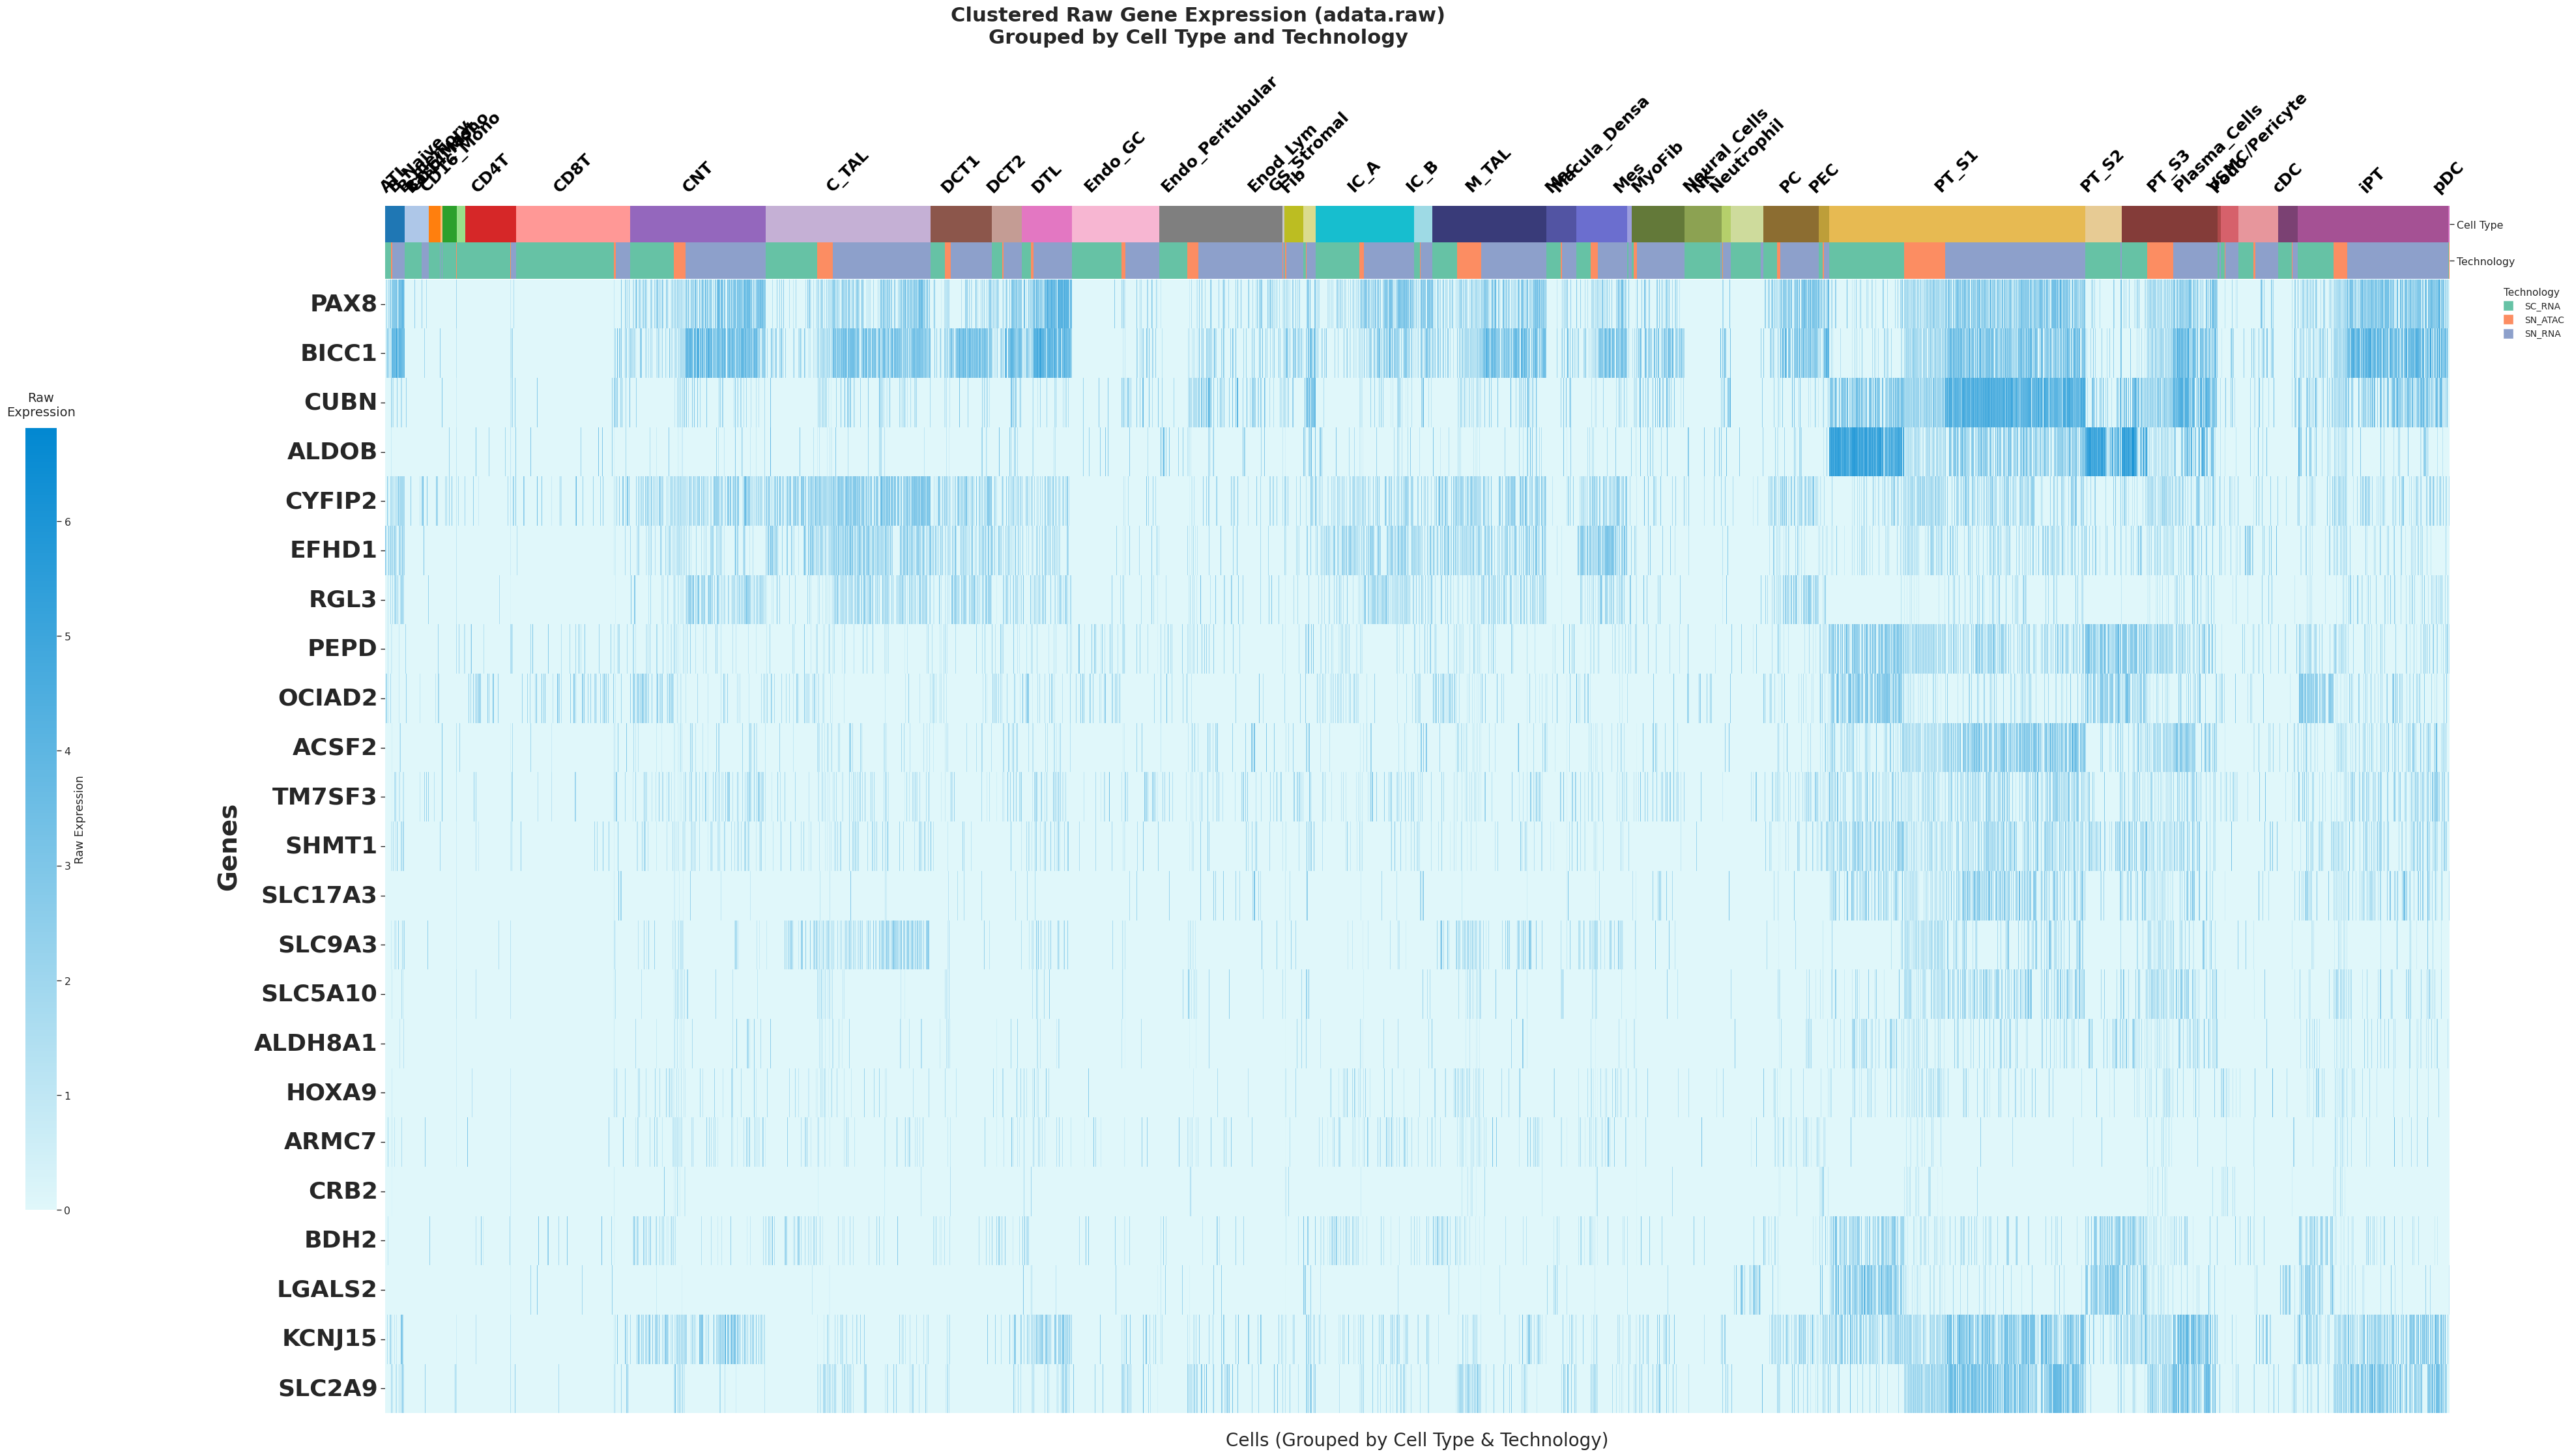

In [ ]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D

# --- 1. Define genes of interest ---
genes = [
    "ALDOB","ALDH8A1","NAT8B","SLC5A10","PAX8","CUBN","SLC17A3","ACSF2","ARMC7",
    "BDH2","BICC1","CRB2","CYFIP2","EFHD1","HOXA9","KCNJ15","LGALS2","OCIAD2",
    "PEPD","RGL3","SHMT1","SLC2A9","SLC9A3","TM7SF3"
]

# --- 2. Ensure raw layer exists ---
if adata.raw is None:
    raise ValueError("❌ adata.raw is None — raw layer missing in AnnData.")

# --- 3. Filter available genes ---
genes_available = [g for g in genes if g in adata.raw.var_names]
missing = set(genes) - set(genes_available)
print(f"✅ Found {len(genes_available)} genes in adata.raw")
if missing:
    print(f"⚠️ Missing genes: {missing}")

# --- 4. Keep only annotated cells with cell type and tech ---
adata_filtered = adata[
    (~adata.obs["Cluster_Idents_New2"].isna()) &
    (~adata.obs["tech"].isna())
].copy()
print(f"✅ Using {adata_filtered.n_obs:,} cells with valid annotations")

# --- 5. Extract raw expression ---
X = adata_filtered.raw[:, genes_available].to_adata().to_df()
X["Cluster_Idents_New2"] = adata_filtered.obs["Cluster_Idents_New2"].astype(str).values
X["tech"] = adata_filtered.obs["tech"].astype(str).values
X = X.sort_values(["Cluster_Idents_New2", "tech"])

# --- 6. Prepare expression matrix ---
expr_mat = X[genes_available].T
celltypes = X["Cluster_Idents_New2"].values
techs = X["tech"].values

# --- 7. Color palettes ---
unique_cts = np.unique(celltypes)
unique_techs = np.unique(techs)

# Distinct cell type colors (≥57)
cell_palette = (
    sns.color_palette("tab20", 20)
    + sns.color_palette("tab20b", 20)
    + sns.color_palette("tab20c", 20)
)[:len(unique_cts)]
celltype_colors = dict(zip(unique_cts, cell_palette))

# Tech colors (simple)
tech_palette = sns.color_palette("Set2", len(unique_techs))
tech_colors = dict(zip(unique_techs, tech_palette))

# Map color bars
celltype_color_series = pd.Series(celltypes, index=expr_mat.columns).map(celltype_colors)
tech_color_series = pd.Series(techs, index=expr_mat.columns).map(tech_colors)
col_colors = pd.DataFrame({
    "Cell Type": celltype_color_series,
    "Technology": tech_color_series
})

# --- 8. Sky-blue color scale (for raw expression) ---
skyblue_cmap = LinearSegmentedColormap.from_list("skyblue_cmap", ["#e0f7fa", "#0288d1"])

# --- 9. Clustered heatmap ---
sns.set_theme(context="paper", style="white", font="DejaVu Sans", font_scale=1.3)
g = sns.clustermap(
    expr_mat,
    cmap=skyblue_cmap,
    col_colors=col_colors,
    figsize=(40, 24),
    xticklabels=False,
    yticklabels=True,
    col_cluster=False,
    row_cluster=True,
    cbar_kws={"label": "Raw Expression", "shrink": 0.5, "aspect": 10},
    dendrogram_ratio=(0.01, 0.01),
)

# --- 10. Hide dendrograms ---
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

# --- 11. Adjust colorbar ---
cbar = g.cax
g.fig.subplots_adjust(left=0.18, right=0.98, top=0.9, bottom=0.12)
cbar.set_position([0.05, 0.25, 0.012, 0.5])
cbar.set_title("Raw\nExpression", fontsize=14, pad=14)

# --- 12. Title & labels ---
plt.suptitle(
    "Clustered Raw Gene Expression (adata.raw)\nGrouped by Cell Type and Technology",
    y=1.02, fontsize=22, fontweight="bold"
)
g.ax_heatmap.set_xlabel("Cells (Grouped by Cell Type & Technology)", fontsize=20, labelpad=20)

# --- 13. Gene labels on LEFT side ---
g.ax_heatmap.yaxis.tick_left()
g.ax_heatmap.yaxis.set_label_position("left")
g.ax_heatmap.set_ylabel("Genes", fontsize=28, fontweight="bold", labelpad=14)
for label in g.ax_heatmap.get_yticklabels():
    label.set_fontsize(26)
    label.set_fontweight("bold")

# --- 14. Compute cluster centers for labels ---
boundaries, prev = [], None
for i, ct in enumerate(celltypes):
    if ct != prev:
        boundaries.append(i)
        prev = ct
boundaries.append(len(celltypes))
centers = [(boundaries[i] + boundaries[i+1]) / 2 for i in range(len(boundaries) - 1)]

# --- 15. Add cell type labels ABOVE heatmap ---
for i, ct in enumerate(unique_cts):
    g.ax_col_colors.text(
        centers[i],
        -0.3,
        ct,
        ha="center",
        va="bottom",
        rotation=45,
        fontsize=18,
        fontweight="bold",
        color="black",
        transform=g.ax_col_colors.transData,
        clip_on=False,
    )

# --- 16. Legend for tech only ---
tech_handles = [
    Line2D([0], [0], marker='s', color='w', label=t, markerfacecolor=c, markersize=12)
    for t, c in tech_colors.items()
]
g.ax_heatmap.legend(
    handles=tech_handles,
    title="Technology",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False,
    fontsize=10,
    title_fontsize=11
)

# --- 17. Final layout ---
plt.tight_layout(rect=[0.1, 0.1, 0.98, 0.95])

# --- 18. Save outputs ---
g.savefig("raw_expression_heatmap_celltype_top_tech_bottom_left_genelabels.png", dpi=600, bbox_inches="tight", pad_inches=0.05)
g.savefig("raw_expression_heatmap_celltype_top_tech_bottom_left_genelabels.pdf", dpi=600, bbox_inches="tight", pad_inches=0.05)

print("✅ Saved as: raw_expression_heatmap_celltype_top_tech_bottom_left_genelabels.[png/pdf]")

plt.show()


✅ Found 23 genes in adata.raw
⚠️ Missing genes: {'NAT8B'}


✅ Using 588,177 cells with valid annotations
Z-score range after clipping: -0.92 to 10.00


/mnt/home3/miska/nm667/miniconda3/envs/cosmaxSpatial/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_1911936/456659063.py:159: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0.1, 0.1, 0.98, 0.95])


✅ Saved as: zscore_heatmap_celltype_top_tech_bottom_left_genelabels.[png/pdf]


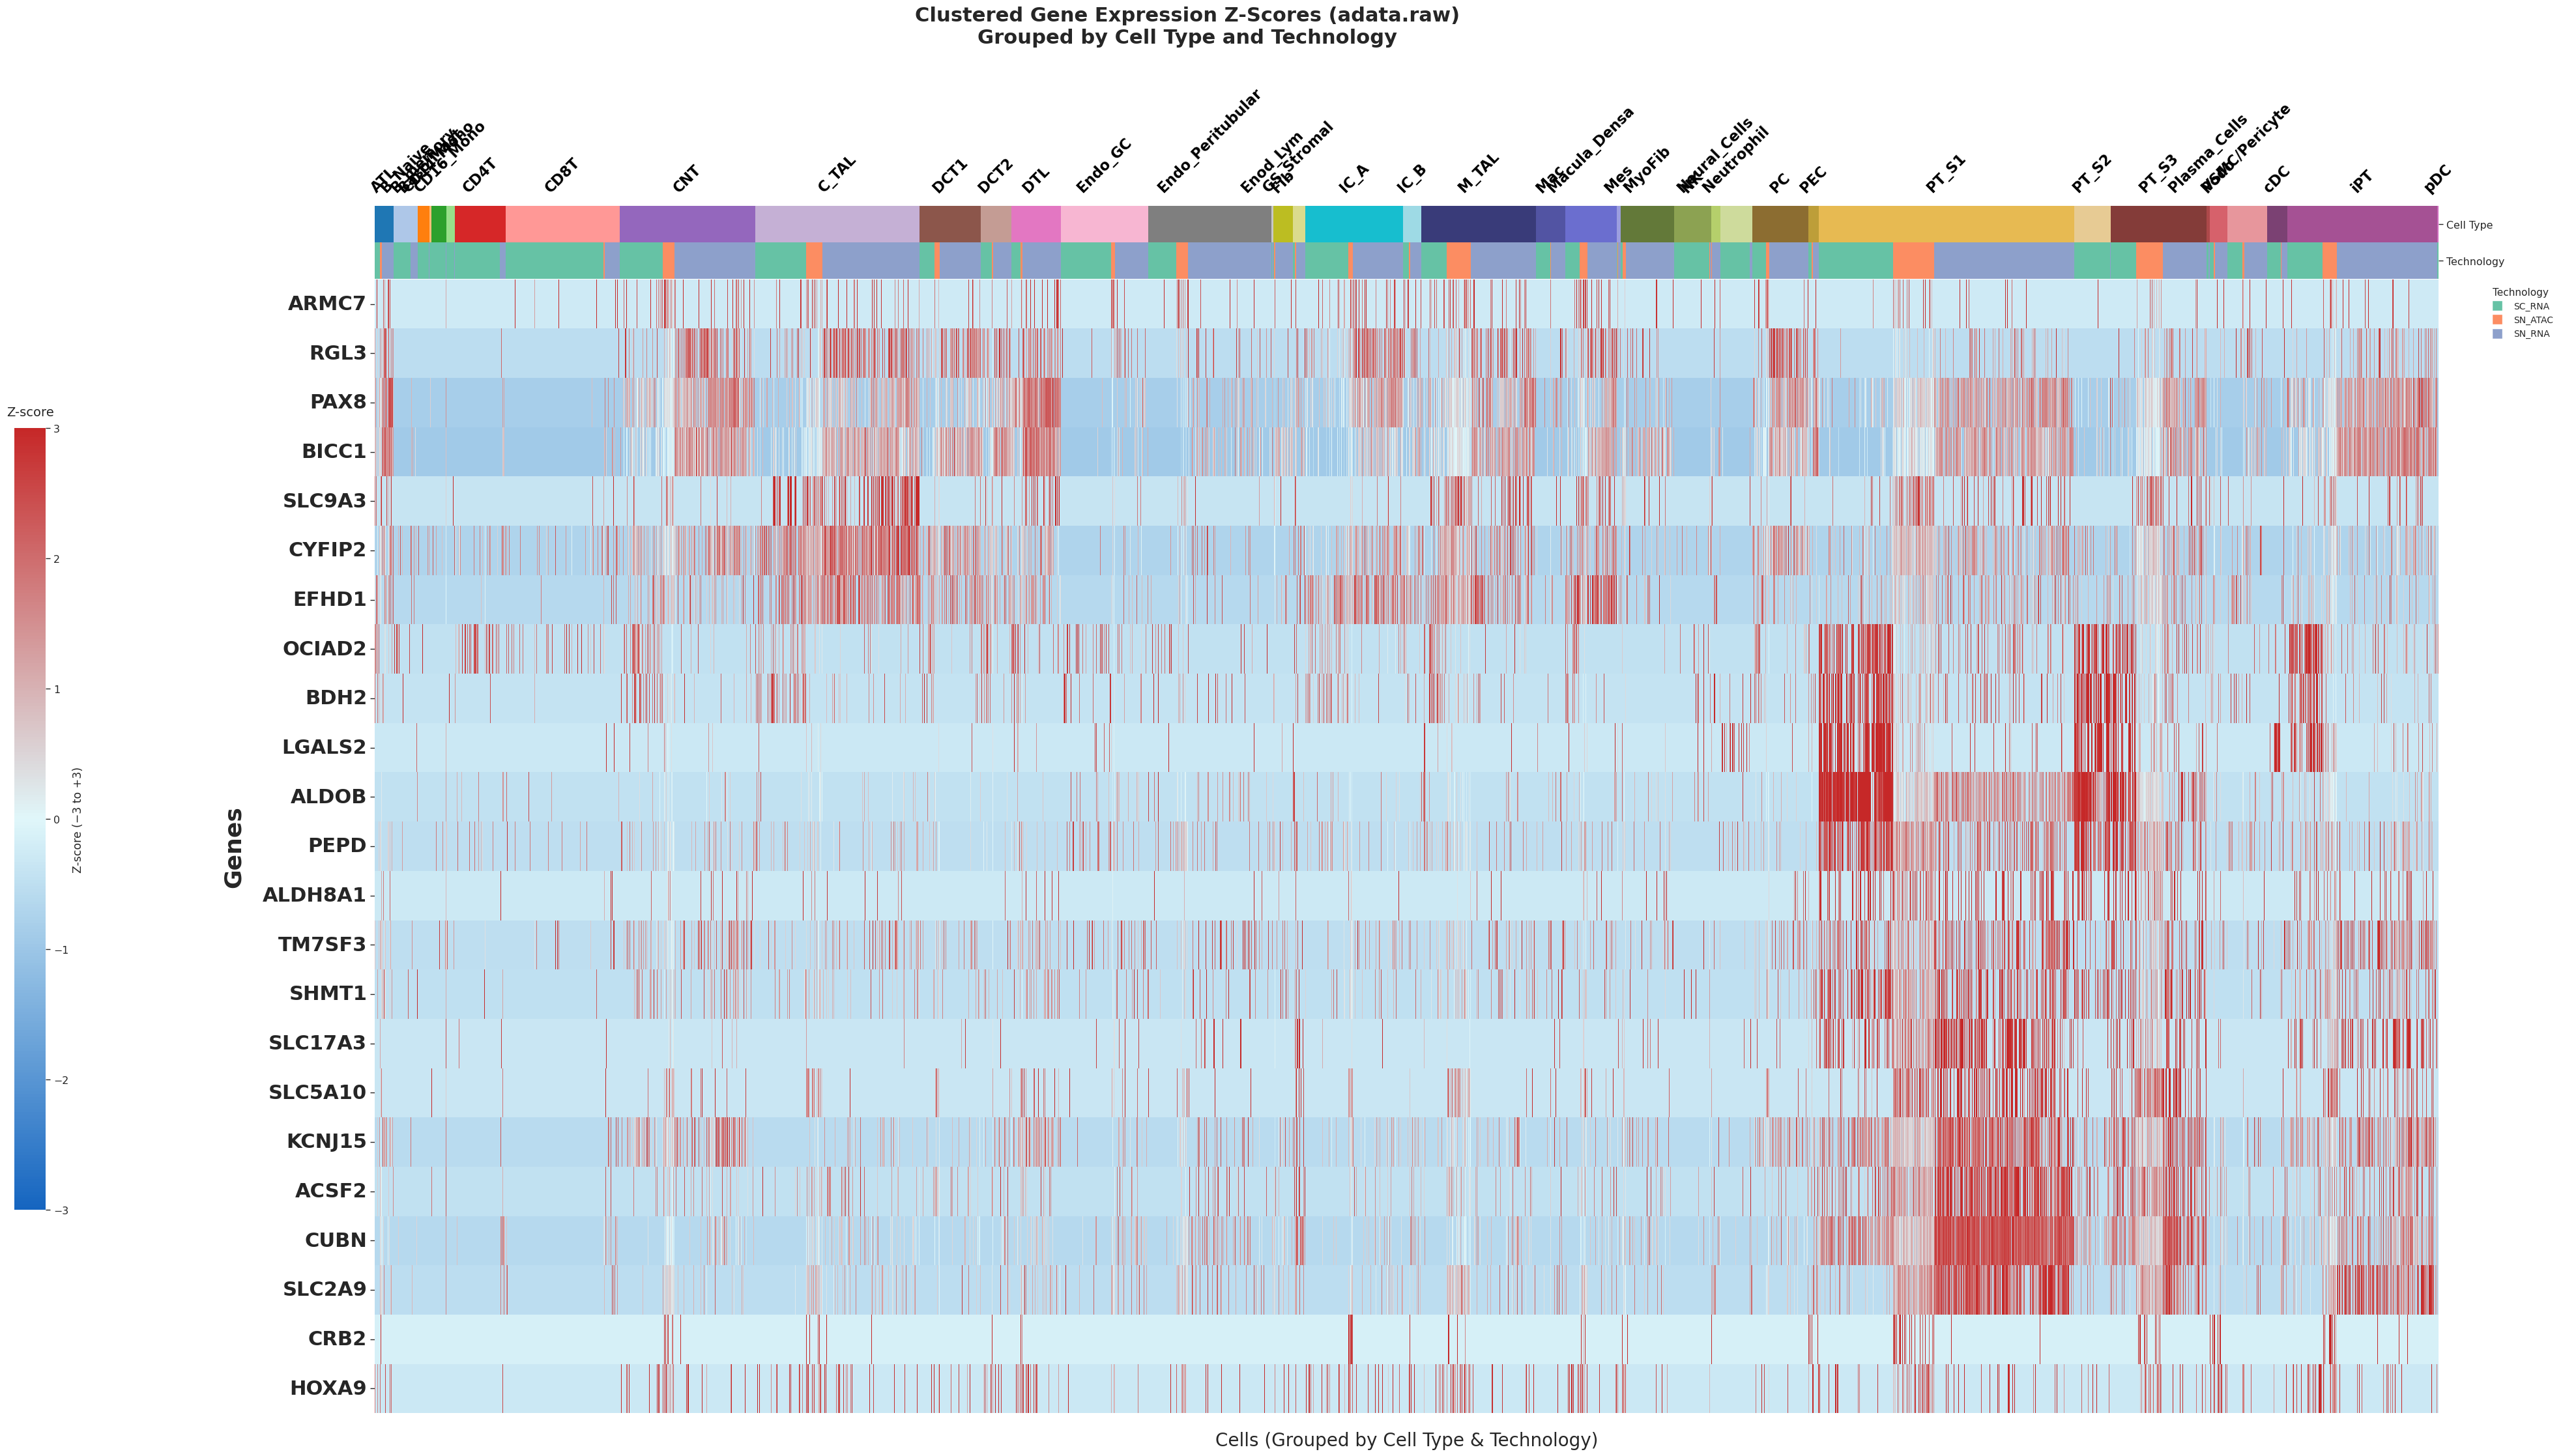

In [ ]:

# --- 1. Define genes of interest ---
genes = [
    "ALDOB","ALDH8A1","NAT8B","SLC5A10","PAX8","CUBN","SLC17A3","ACSF2","ARMC7",
    "BDH2","BICC1","CRB2","CYFIP2","EFHD1","HOXA9","KCNJ15","LGALS2","OCIAD2",
    "PEPD","RGL3","SHMT1","SLC2A9","SLC9A3","TM7SF3"
]

# --- 2. Ensure raw layer exists ---
if adata.raw is None:
    raise ValueError("❌ adata.raw is None — raw layer missing in AnnData.")

# --- 3. Filter available genes ---
genes_available = [g for g in genes if g in adata.raw.var_names]
missing = set(genes) - set(genes_available)
print(f"✅ Found {len(genes_available)} genes in adata.raw")
if missing:
    print(f"⚠️ Missing genes: {missing}")

# --- 4. Keep only annotated cells ---
adata_filtered = adata[
    (~adata.obs["Cluster_Idents_New2"].isna()) &
    (~adata.obs["tech"].isna())
].copy()
print(f"✅ Using {adata_filtered.n_obs:,} cells with valid annotations")

# --- 5. Extract raw expression ---
X = adata_filtered.raw[:, genes_available].to_adata().to_df()
X["Cluster_Idents_New2"] = adata_filtered.obs["Cluster_Idents_New2"].astype(str).values
X["tech"] = adata_filtered.obs["tech"].astype(str).values
X = X.sort_values(["Cluster_Idents_New2", "tech"])  # grouped by cell type then tech

# --- 6. Prepare matrix (genes × cells) ---
expr_mat = X[genes_available].T
celltypes = X["Cluster_Idents_New2"].values
techs = X["tech"].values

# --- 7. Compute Z-scores ---
zscore_mat = expr_mat.apply(lambda x: (x - x.mean()) / x.std(ddof=0), axis=1)
zscore_mat = zscore_mat.fillna(0)

# --- 8. Clip for visual stability ---
zscore_clip = zscore_mat.clip(lower=-10, upper=10)
print(f"Z-score range after clipping: {zscore_clip.values.min():.2f} to {zscore_clip.values.max():.2f}")

# --- 9. Build color palettes ---
unique_cts = np.unique(celltypes)
unique_techs = np.unique(techs)

# ≥ 57 distinct colors for cell types
cell_palette = (
    sns.color_palette("tab20", 20)
    + sns.color_palette("tab20b", 20)
    + sns.color_palette("tab20c", 20)
)[:len(unique_cts)]
celltype_colors = dict(zip(unique_cts, cell_palette))

# Tech color palette (3–5 colors max)
tech_palette = sns.color_palette("Set2", len(unique_techs))
tech_colors = dict(zip(unique_techs, tech_palette))

# Map annotations
celltype_color_series = pd.Series(celltypes, index=zscore_clip.columns).map(celltype_colors)
tech_color_series = pd.Series(techs, index=zscore_clip.columns).map(tech_colors)

# Combine (cell type = top, tech = bottom)
col_colors = pd.DataFrame({
    "Cell Type": celltype_color_series,
    "Technology": tech_color_series
})

# --- 10. Diverging color map ---
z_cmap = LinearSegmentedColormap.from_list("z_cmap", ["#1565c0", "#e0f7fa", "#c62828"])

# --- 11. Clustered heatmap ---
sns.set_theme(context="paper", style="white", font="DejaVu Sans", font_scale=1.3)
g = sns.clustermap(
    zscore_clip,
    cmap=z_cmap,
    col_colors=col_colors,
    figsize=(40, 24),
    xticklabels=False,
    yticklabels=True,
    col_cluster=False,
    row_cluster=True,
    center=0,
    vmin=-3, vmax=3,
    cbar_kws={"label": "Z-score (−3 to +3)", "shrink": 0.5, "aspect": 10},
    dendrogram_ratio=(0.01, 0.01),
)

# --- 12. Hide dendrograms ---
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

# --- 13. Adjust colorbar ---
cbar = g.cax
g.fig.subplots_adjust(left=0.18, right=0.98, top=0.9, bottom=0.12)
cbar.set_position([0.05, 0.25, 0.012, 0.5])
cbar.set_title("Z-score", fontsize=14, pad=14)

# --- 14. Title & labels ---
plt.suptitle(
    "Clustered Gene Expression Z-Scores (adata.raw)\nGrouped by Cell Type and Technology",
    y=1.02, fontsize=22, fontweight="bold"
)
g.ax_heatmap.set_xlabel("Cells (Grouped by Cell Type & Technology)", fontsize=20, labelpad=20)

# --- 15. Move gene labels to LEFT side ---
g.ax_heatmap.yaxis.tick_left()
g.ax_heatmap.yaxis.set_label_position("left")
g.ax_heatmap.set_ylabel("Genes", fontsize=26, fontweight="bold", labelpad=20)

for label in g.ax_heatmap.get_yticklabels():
    label.set_fontsize(22)
    label.set_fontweight("bold")
    label.set_horizontalalignment('right')

# --- 16. Compute cluster label positions (centers) ---
boundaries, prev = [], None
for i, ct in enumerate(celltypes):
    if ct != prev:
        boundaries.append(i)
        prev = ct
boundaries.append(len(celltypes))
centers = [(boundaries[i] + boundaries[i+1]) / 2 for i in range(len(boundaries) - 1)]

# --- 17. Add cell type labels ABOVE heatmap ---
for i, ct in enumerate(np.unique(celltypes)):
    g.ax_col_colors.text(
        centers[i],
        -0.3,  # slightly above the annotation bars
        ct,
        ha="center",
        va="bottom",
        rotation=45,
        fontsize=16,
        fontweight="bold",
        color="black",
        transform=g.ax_col_colors.transData,
        clip_on=False,
    )

# --- 18. Add legend for tech only ---
tech_handles = [
    Line2D([0], [0], marker='s', color='w', label=t, markerfacecolor=c, markersize=12)
    for t, c in tech_colors.items()
]
g.ax_heatmap.legend(
    handles=tech_handles,
    title="Technology",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False,
    fontsize=10,
    title_fontsize=11
)

# --- 19. Save high-quality outputs ---
plt.tight_layout(rect=[0.1, 0.1, 0.98, 0.95])
g.savefig("zscore_heatmap_celltype_top_tech_bottom_left_genelabels.png", dpi=600, bbox_inches="tight", pad_inches=0.05)
g.savefig("zscore_heatmap_celltype_top_tech_bottom_left_genelabels.pdf", dpi=600, bbox_inches="tight", pad_inches=0.05)

print("✅ Saved as: zscore_heatmap_celltype_top_tech_bottom_left_genelabels.[png/pdf]")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Convert obs to DataFrame for sampling
obs_df = adata.obs.copy()

# Keep only annotated entries
obs_df = obs_df[
    (~obs_df['Cluster_Idents_New2'].isna()) &
    (~obs_df['tech'].isna())
].copy()

# Define how many cells per (tech × celltype) to sample
n_per_group = 100  # adjust for speed vs representativeness

# Perform stratified sampling
sampled_indices = (
    obs_df.groupby(['tech', 'Cluster_Idents_New2'], group_keys=False)
    .apply(lambda x: x.sample(min(len(x), n_per_group), random_state=42))
    .index
)

# Create subset AnnData
adata_sub = adata[sampled_indices].copy()

print(f"✅ Subsampled AnnData created with {adata_sub.n_obs:,} cells")
print("Tech breakdown:")
print(adata_sub.obs['tech'].value_counts())
print("Cell type breakdown:")
print(adata_sub.obs['Cluster_Idents_New2'].value_counts().head())


/tmp/ipykernel_1911936/2205277116.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_df.groupby(['tech', 'Cluster_Idents_New2'], group_keys=False)
/tmp/ipykernel_1911936/2205277116.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), n_per_group), random_state=42))


✅ Subsampled AnnData created with 10,869 cells
Tech breakdown:
tech
SC_RNA     3893
SN_RNA     3876
SN_ATAC    3100
Name: count, dtype: int64
Cell type breakdown:
Cluster_Idents_New2
ATL      300
DTL      300
DCT2     300
DCT1     300
C_TAL    300
Name: count, dtype: int64
